In [1]:
import os
import numpy as np 
import pandas as pd 
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [2]:
dir_path = os.path.dirname(os.path.realpath('2022849446_23_11_22.ipynb'))
data = pd.read_csv(dir_path + '/Samsung_stock_price.csv',parse_dates=['Date'])

In [3]:
# import Dataset
data.head()

,Date,Open,High,Low,Close,Volume
0,2017-11-02,57500,57520,56760,57060,214421
1,2017-11-03,57060,57140,55860,56380,198716
2,2017-11-06,56380,56500,55340,56380,180019
3,2017-11-07,56380,56920,55860,56100,149291
4,2017-11-08,56100,57060,55860,56760,170404


In [4]:
cols_drop = ['Open','Close']
data = data.drop(cols_drop, axis=1)
data.head()

,Date,High,Low,Volume
0,2017-11-02,57520,56760,214421
1,2017-11-03,57140,55860,198716
2,2017-11-06,56500,55340,180019
3,2017-11-07,56920,55860,149291
4,2017-11-08,57060,55860,170404


In [5]:
vol = np.array(data['Volume'])
high = np.array(data['High'])
low = np.array(data['Low'])

Text(0.5, 0, 'Shares')

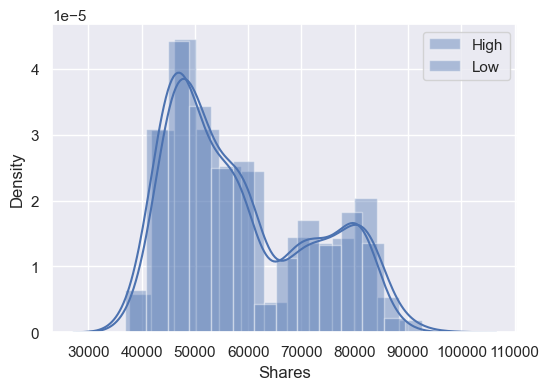

In [6]:
sns.set()
#Dont work
sns.set_palette(sns.color_palette())

#Fix this colorscheme
fig, axes = plt.subplots(figsize = (6,4))
sns.histplot(data.High, label = 'High', kde=True,stat="density",kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
sns.histplot(data.Low, label = 'Low', kde=True,stat="density",kde_kws=dict(cut=3),alpha=.4, edgecolor=(1, 1, 1, .4))
axes.legend()
axes.set_xlabel('Shares')


# fig, axes = plt.subplots(3, 1)
# sns.distplot(data.High, label = 'High', ax=axes[0])
# sns.distplot(data.Low, label = 'Low',ax=axes[0])
# axes[0].legend()
# axes[0].set_xlabel('Shares')

# sns.histplot(data.High, label = 'High',ax=axes[1])
# sns.histplot(data.Low, label = 'Low',ax=axes[1])
# axes[1].legend()
# axes[1].set_xlabel('Shares')

# axes[2].hist(data.High, label = 'High')
# axes[2].hist(data.Low, label = 'Low')
# plt.legend()
# ax.set_xlabel('Shares')

<AxesSubplot:xlabel='High', ylabel='Low'>

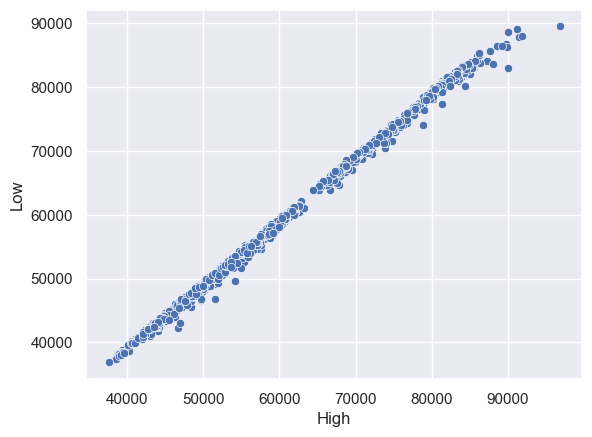

In [7]:
sns.scatterplot(x = data.High, y = data.Low)

In [8]:
x = data[['High','Low']]
y = data['Volume']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [21]:
lRegression = LinearRegression()  
lRegression.fit(x_train, y_train)
y_test

312     11506720
555     13276067
447     12441837
665     16214932
56        191010
          ...   
545     19749457
256      5192638
102       255365
1137    28338608
957     23992458
Name: Volume, Length: 246, dtype: int64

In [22]:
lRegressionPredict = lRegression.predict(x_test)
lRegressionPredict

array([ 8550488.51914036, 19389917.03204483, 10890321.67303288,
       12019382.33313584, 13200462.32614791, 18496798.82518905,
        9989722.88443393, 10321476.4866215 , 13674415.66840017,
       12531255.69304323, 13472428.73093915, 11916952.45068473,
        9932751.05792999, 13314750.71844882, 10055324.42365754,
       18242096.33799553, 14795421.18127185, 13600758.9819451 ,
       19894022.52746487,  7341439.72181571, 20885548.6583541 ,
       28790685.74514389,  7629171.68177676, 17748121.16380209,
        6880206.73764569, 14075742.04991782,  9442457.59501964,
       12343942.63632435, 13572560.35143727, 13139813.28051931,
       13614571.0144549 , 17705535.93529612,  7528465.49579042,
        6161451.40323126, 14754559.6492306 ,  7744551.74850529,
       12135624.24809676, 20985680.27885216, 11343212.22722733,
        8543295.22014135, 13470705.03447443, 18080736.61422199,
       16105750.73007113,  8716221.67886215,  7269219.44908136,
       13948335.59585136, 10336150.36736

In [23]:
lRegression.score(x_train, y_train)

0.39843655601449346

In [24]:
regressionValues = pd.DataFrame({'Actual value': y_test, 'Predicted value': lRegressionPredict})
regressionValues.head()

,Actual value,Predicted value
312,11506720,8.550489e+06
555,13276067,1.938992e+07
447,12441837,1.089032e+07
665,16214932,1.201938e+07
56,191010,1.320046e+07


In [25]:
RSquared = lRegression.score(x,y)*100
meanAbErr = metrics.mean_absolute_error(y_test, lRegressionPredict)
meanSqErr = metrics.mean_squared_error(y_test, lRegressionPredict)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, lRegressionPredict))

In [26]:
RSquared # R Squared

38.376753960625244

In [27]:
meanAbErr # Mean absolute error

4761104.446605703

In [28]:
meanSqErr # Mean Square Error

49530342932502.38

In [29]:
rootMeanSqErr # Root Mean Square Error

7037779.687692872

In [81]:
# Logistic regression wont work with 2 columns
x1 = data['High']
y = data['Volume']

x1_train, x1_test, y_train, y_test = train_test_split(x1, y, test_size = 0.2)
x1_train = np.array(x1_train)
x1_train_refit = x1_train.reshape(-1,1)
x1_test = np.array(x1_test)
x1_test_refit = x1_test.reshape(-1,1)
y_train = np.array(y_train)
y_train_refit = y_train.reshape(-1,1)

lgreg = LogisticRegression(solver='liblinear',random_state=0).fit(x1_train_refit, y_train)
lgreg_pred = lgreg.predict(x1_test_refit)
lgreg_pred

array([90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306

In [82]:
lgreg.score(x1_train_refit, y_train_refit)

0.0010204081632653062

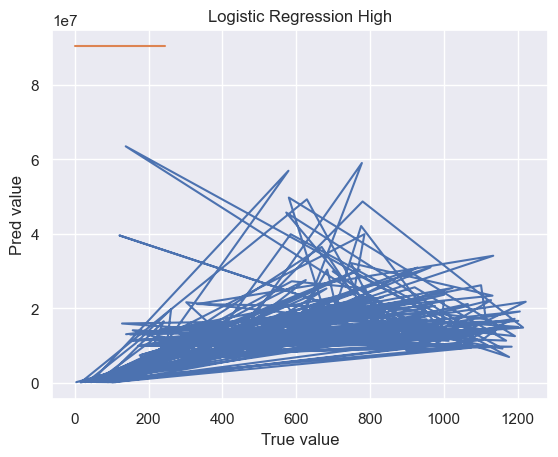

In [83]:
plt.plot(y_test, label='Actual')
plt.plot(lgreg_pred, label='Prediction')
plt.xlabel('True value')
plt.ylabel('Pred value')
plt.title('Logistic Regression High')
plt.show()

In [88]:
x2 = data['Low'] 
y = data['Volume']

x2_train, x2_test, y_train, y_test = train_test_split(x2, y, test_size = 0.2)
x2_train = np.array(x2_train)
x2_train_refit = x2_train.reshape(-1,1)
x2_test = np.array(x2_test)
x2_test_refit = x2_test.reshape(-1,1)
y_train = np.array(y_train)
y_train_refit = y_train.reshape(-1,1)

lgreg = LogisticRegression(random_state=0).fit(x2_train_refit, y_train)
lgreg_pred = lgreg.predict(x2_test_refit)
lgreg_pred

array([90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306177,
       90306177, 90306177, 90306177, 90306177, 90306177, 90306

In [85]:
lgreg.score(x2_train_refit, y_train_refit)

0.0010204081632653062

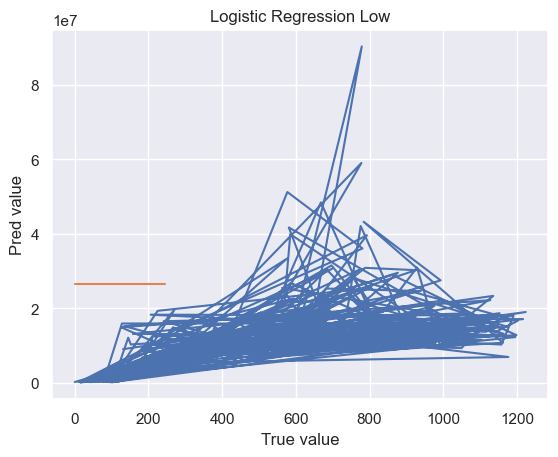

In [86]:
plt.plot(y_test, label='Actual')
plt.plot(lgreg_pred, label='Prediction')
plt.xlabel('True value')
plt.ylabel('Pred value')
plt.title('Logistic Regression Low')
plt.show()